In [5]:
%load_ext rpy2.ipython
%matplotlib inline

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

from functions import graphs 
from functions import permutation as perm
from functions import data_manage as dm
from collections import OrderedDict

# Introduction


This program finds the optimal curve for an animals performance in delayed discounting and finds the indifference point (IDP) at which a subject chooses the large reward in 50% of trials within a block based on an optimized least squares regression curve fit.

It uses the hyperbolic formula a / (1 + k*d)

* a = y value where x = 0
* d = timepoint (x value)
* k = value representing the slope
  * greater value = steeper slope/more impulsive
  * lesser value = flatter slope/less impulsive

If the IDP at 50% occurs before the starting time delay (0 seconds) the animal is dropped from the analysis. The means are also attained where if the IDP at 50% > 60secs, there is no ceiling set, the ceiling is set at 60 and 300 seconds respectively.

##### Things to add

1. make it easy to call raw data by group
2. take out Kruskal-Wallis tests

# Import Data and Find Indifference Points

In [7]:
f = 'data_examples/idp_example.xlsx'
s = 'idp_data'

In [8]:
df = pd.read_excel(f, s)

In [11]:
info = dm.idp_frame(df)

group_dict = OrderedDict(list(info.groupby('group', sort=False)))

v50cn = 'v50_ceilNONE'
v50c60 = 'v50_ceil60'
v50c300 = 'v50_ceil300'
k = 'k'

### Parametric Analysis in R

In [12]:
%%R -i info
#move into R environment for hypthothesis testing

#format data into matrix
matrix = data.frame(info)

#build arrays for each variable of interest
group <- matrix[,1]
k <- matrix[,2]
v_none <- matrix[,5]
v_60 <- matrix[,6]
v_300 <- matrix[,7]

options(contrasts=c('contr.sum', 'contr.poly'))

# build model for each anova
fit_k = aov(k ~ group)
fit_v_none = aov(v_none ~ matrix[,'group'])
fit_v_60 = aov(v_60 ~ group)
fit_v_300 = aov(v_300 ~ group)

# runs anovas on each model with type III sum of squares
anova_k = drop1(fit_k,~.,test='F')
anova_none = drop1(fit_v_none,~.,test='F')
anova_60 = drop1(fit_v_60,~.,test='F')
anova_300 = drop1(fit_v_300,~.,test='F')

# Data Tables

### Individual Subjects Data

In [13]:
info

,group,k,STD_DEV_ERR_on_params,a,v50_ceilNONE,v50_ceil60,v50_ceil300
2,PF,1.205207,0.352627,98.333333,0.802076,0.802076,0.802076
3,PF,2.087649,0.319801,96.666667,0.447074,0.447074,0.447074
4,PF,0.000381,0.000150,98.333333,2535.767224,60.000000,300.000000
27,PF,0.000913,0.000315,98.333333,1059.266034,60.000000,300.000000
26,PF,0.000500,0.000220,100.000000,2000.801712,60.000000,300.000000
25,PF,0.057991,0.009806,88.333333,13.220453,13.220453,13.220453
11,CET,1.175680,0.280784,100.000000,0.850572,0.850572,0.850572
12,CET,2.352917,0.732635,96.481481,0.395097,0.395097,0.395097
14,CET,0.308987,0.093630,100.000000,3.236378,3.236378,3.236378
30,CET,0.007864,0.002507,66.666667,42.385004,42.385004,42.385004


### Subjects who had set ceilings

In [14]:
cs = info[info['v50_ceil300'] >= 60]
cs

,group,k,STD_DEV_ERR_on_params,a,v50_ceilNONE,v50_ceil60,v50_ceil300
4,PF,0.000381,0.000150,98.333333,2535.767224,60,300.000000
27,PF,0.000913,0.000315,98.333333,1059.266034,60,300.000000
26,PF,0.000500,0.000220,100.000000,2000.801712,60,300.000000
33,CET,0.010697,0.004878,83.333333,62.321577,60,62.321577
15,CET-TH,0.003478,0.000674,100.000000,287.494446,60,287.494446
37,CET-TH,0.002734,0.001134,100.000000,365.789754,60,300.000000
38,CET-TH,-0.002771,0.008357,16.666667,240.570116,60,240.570116
19,CET-PTD,0.015430,0.004553,100.000000,64.809631,60,64.809631
21,CET-PTD,0.000116,0.000204,100.000000,8585.798487,60,300.000000
43,CET-PTD,0.000598,0.000248,100.000000,1673.631012,60,300.000000


#### Used mean from V_50ceilNONE to determine ceiling set at 300

In [15]:
cs2 = cs[cs['v50_ceilNONE'] >= 70] 

cs2[cs2['v50_ceilNONE'] < 1000].mean()

k                          0.001147
STD_DEV_ERR_on_params      0.003388
a                         72.222222
v50_ceilNONE             297.951439
v50_ceil60                60.000000
v50_ceil300              276.021521
dtype: float64

# Analysis


## Group Timepoint Means 

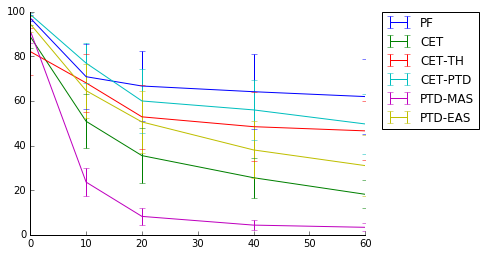

In [16]:
g, g_sem = dm.gb_groups(df)

fig, ax = plt.subplots()

x = df.index

ax.errorbar(x, g['PF'], yerr=g_sem['PF'], fmt='-', label='PF')
ax.errorbar(x, g['CET'], yerr=g_sem['CET'], fmt='-', label='CET')
ax.errorbar(x, g['CET-TH'], yerr=g_sem['CET-TH'], fmt='-', label='CET-TH')
ax.errorbar(x, g['CET-PTD'], yerr=g_sem['CET-PTD'], fmt='-', label='CET-PTD')
ax.errorbar(x, g['PTD-MAS'], yerr=g_sem['PTD-MAS'], fmt='-', label ='PTD-MAS')
ax.errorbar(x, g['PTD-EAS'], yerr=g_sem['PTD-EAS'], fmt='-', label='PTD-EAS')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [17]:
group_dict['PF']

,group,k,STD_DEV_ERR_on_params,a,v50_ceilNONE,v50_ceil60,v50_ceil300
2,PF,1.205207,0.352627,98.333333,0.802076,0.802076,0.802076
3,PF,2.087649,0.319801,96.666667,0.447074,0.447074,0.447074
4,PF,0.000381,0.000150,98.333333,2535.767224,60.000000,300.000000
27,PF,0.000913,0.000315,98.333333,1059.266034,60.000000,300.000000
26,PF,0.000500,0.000220,100.000000,2000.801712,60.000000,300.000000
25,PF,0.057991,0.009806,88.333333,13.220453,13.220453,13.220453


## Indifference Point with No Ceiling

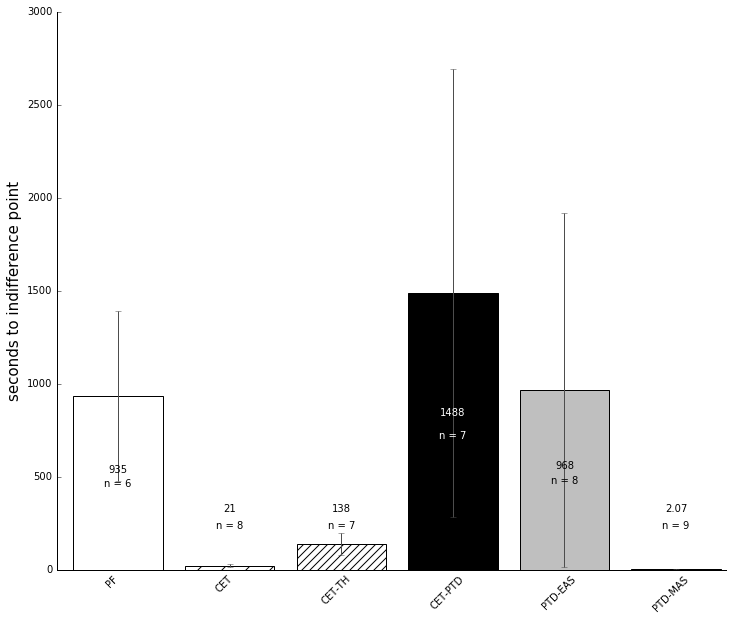

In [18]:
f, ax = plt.subplots(figsize = (12,10))

graphs.bar(dm.by_group(info, 'group', 'v50_ceilNONE'), ax=ax)

##### Kruskal-Wallis Test

In [19]:
scipy.stats.mstats.kruskalwallis(*[group[v50cn] for group in group_dict.values()])

KruskalResult(statistic=15.353761214630794, pvalue=0.0089530339236371017)

##### Permutation F-Test

In [20]:
report, p = perm.permuted_f([group[v50cn] for group in group_dict.values()],
                        num_permutes = 100000)

if p <= .05:
    df_t, df_p = perm.perm_mc_ttests([group[v50cn] for group in group_dict.values()],
                                nperms = 10000,
                                labels = group_dict.keys())
else:
    df_t = pd.DataFrame()
    
report

'F(5, 39) = 0.962328057109, p = 0.39133'

In [21]:
if df_t.empty == False:
    print df_t
    print
    print df_p

##### parametric F-Test in R

In [22]:
%%R

# 1-way anova for timepoint at which indifference point = 50% with no ceiling
anova_none

Single term deletions

Model:
v_none ~ matrix[, "group"]
                  Df Sum of Sq       RSS    AIC F value Pr(>F)
<none>                         118090973 677.11               
matrix[, "group"]  5  14569520 132660493 672.35  0.9623 0.4526


## Indifference Point with Ceiling Set at 60

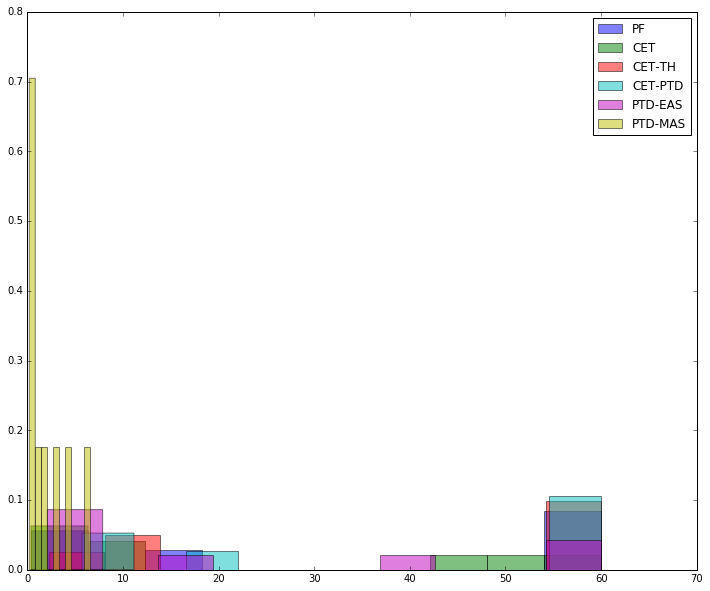

In [23]:
f, ax = plt.subplots(figsize = (12,10))

graphs.histo(group_dict, 'v50_ceil60', bins=10, normed=True, ax=ax)

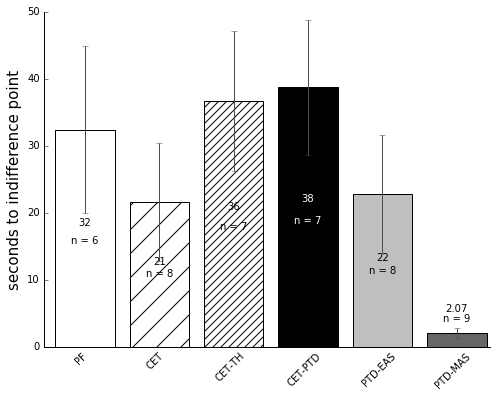

In [24]:
# graph for time at which indifference point = 50% with ceiling set at 60 

f, ax = plt.subplots(figsize = (8,6))
graphs.bar(dm.by_group(info, 'group', 'v50_ceil60'), ax=ax)

##### Kruskal-Wallis Test

In [25]:
scipy.stats.mstats.kruskalwallis(*[group[v50c60] for group in group_dict.values()])

KruskalResult(statistic=15.707797003587249, pvalue=0.0077297846845078757)

##### Permutation F-Test

In [26]:
report, p = perm.permuted_f([group[v50c60] for group in group_dict.values()],
                        num_permutes = 100000)

if p <= .05:
    df_t, df_p = perm.perm_mc_ttests([group[v50c60] for group in group_dict.values()],
                                nperms = 10000,
                                labels=group_dict.keys())
else:
    df_t = pd.DataFrame()
    
report

'F(5, 39) = 2.61617269936, p = 0.04196'

In [27]:
if df_t.empty == False:
    print df_t
    print
    print df_p

              CET    CET-TH   CET-PTD    PTD-EAS  PTD-MAS
PF       0.707287 -0.263271 -0.396255   0.627048  2.42755
CET           NaN  -1.10601  -1.28389 -0.0946639  2.23063
CET-TH        NaN       NaN -0.142896    1.01361  3.30913
CET-PTD       NaN       NaN       NaN    1.18845  3.63064
PTD-EAS       NaN       NaN       NaN        NaN  2.33272
PTD-MAS       NaN       NaN       NaN        NaN      NaN

             CET    CET-TH   CET-PTD   PTD-EAS     PTD-MAS
PF       0.49268  0.792487  0.685887    0.5395   0.0329867
CET          NaN    0.2751  0.212407  0.922153     0.05266
CET-TH       NaN       NaN  0.886067  0.314927  0.00694667
CET-PTD      NaN       NaN       NaN  0.239333  0.00470667
PTD-EAS      NaN       NaN       NaN       NaN   0.0422867
PTD-MAS      NaN       NaN       NaN       NaN         NaN


##### parametric F-Test in R

In [28]:
%%R

# 1-way anova for timepoint at which indifference point = 50% with ceiling set at 60 seconds
anova_60

Single term deletions

Model:
v_60 ~ group
       Df Sum of Sq   RSS    AIC F value  Pr(>F)  
<none>              22240 291.13                  
group   5    7459.5 29700 294.15  2.6162 0.03918 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [29]:
%%R

pairwise.t.test(v_60, group, p.adj='bonf')


	Pairwise comparisons using t tests with pooled SD 

data:  v_60 and group 

        CET   CET-PTD CET-TH PF    PTD-EAS
CET-PTD 1.000 -       -      -     -      
CET-TH  1.000 1.000   -      -     -      
PF      1.000 1.000   1.000  -     -      
PTD-EAS 1.000 1.000   1.000  1.000 -      
PTD-MAS 1.000 0.062   0.097  0.311 1.000  

P value adjustment method: bonferroni 


## Indifference Point with Ceiling Set at 300


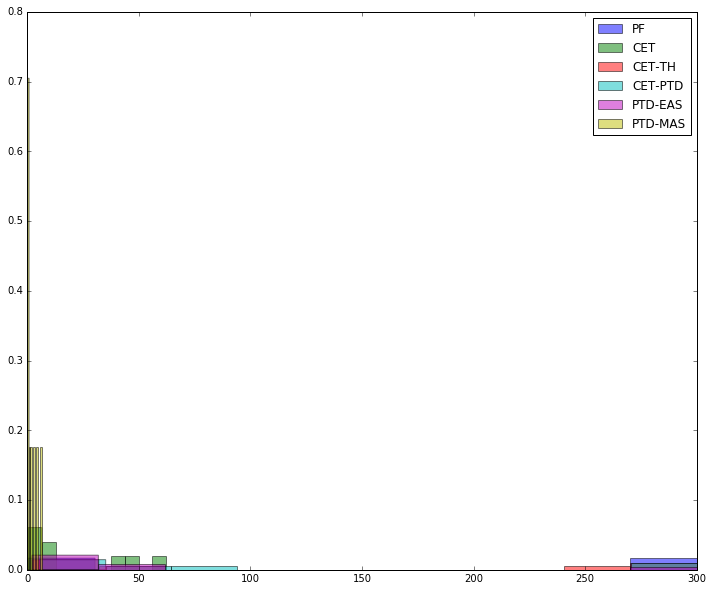

In [30]:
f, ax = plt.subplots(figsize = (12,10))

graphs.histo(group_dict, 'v50_ceil300', bins=10, normed=True, ax=ax)

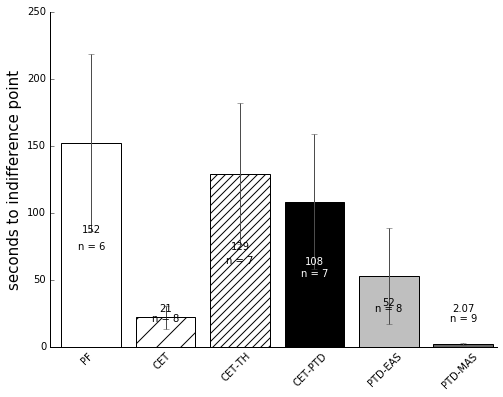

In [31]:
f, ax = plt.subplots(figsize = (8,6))
graphs.bar(dm.by_group(info, 'group', 'v50_ceil300'), ax=ax)

##### Kruskal-Wallis Test

In [32]:
scipy.stats.mstats.kruskalwallis(*[group[v50c300] for group in group_dict.values()])

KruskalResult(statistic=15.465749801639785, pvalue=0.0085470529624836703)

##### Permutation F-Test

In [33]:
report, p = perm.permuted_f([group[v50c300] for group in group_dict.values()],
                        num_permutes = 100000)

if p <= .05:
    df_t, df_p = perm.perm_mc_ttests([group[v50c300] for group in group_dict.values()],
                                nperms = 10000,
                                labels = group_dict.keys())
else:
    df_t = pd.DataFrame()
    
report

'F(5, 39) = 2.49921180204, p = 0.04555'

In [34]:
if df_t.empty == False:
    print df_t
    print
    print df_p

             CET    CET-TH   CET-PTD   PTD-EAS  PTD-MAS
PF       1.95836  0.273806  0.529115   1.32419  2.27679
CET          NaN  -2.00759  -1.69516 -0.832382  2.21716
CET-TH       NaN       NaN  0.285207   1.19752  2.41262
CET-PTD      NaN       NaN       NaN  0.900261  2.11638
PTD-EAS      NaN       NaN       NaN       NaN  1.40864
PTD-MAS      NaN       NaN       NaN       NaN      NaN

               CET     CET-TH   CET-PTD   PTD-EAS    PTD-MAS
PF       0.0804733    0.82076  0.646353  0.215367    0.02804
CET            NaN  0.0667067  0.129067  0.434627  0.0356533
CET-TH         NaN        NaN   0.81088  0.251033  0.0186733
CET-PTD        NaN        NaN       NaN  0.385967  0.0487267
PTD-EAS        NaN        NaN       NaN       NaN   0.191573
PTD-MAS        NaN        NaN       NaN       NaN        NaN


##### parametric F-Test in R

In [35]:
%%R

# 1-way anova for timepoint at which indifference point = 50% with a ceiling set at 270
anova_300

Single term deletions

Model:
v_300 ~ group
       Df Sum of Sq    RSS    AIC F value Pr(>F)  
<none>              430893 424.51                 
group   5    138063 568956 427.02  2.4992 0.0468 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [36]:
%%R

pairwise.t.test(v_300, group, p.adj='bonf')


	Pairwise comparisons using t tests with pooled SD 

data:  v_300 and group 

        CET  CET-PTD CET-TH PF   PTD-EAS
CET-PTD 1.00 -       -      -    -      
CET-TH  0.83 1.00    -      -    -      
PF      0.40 1.00    1.00   -    -      
PTD-EAS 1.00 1.00    1.00   1.00 -      
PTD-MAS 1.00 0.77    0.32   0.15 1.00   

P value adjustment method: bonferroni 


## K Comparisons

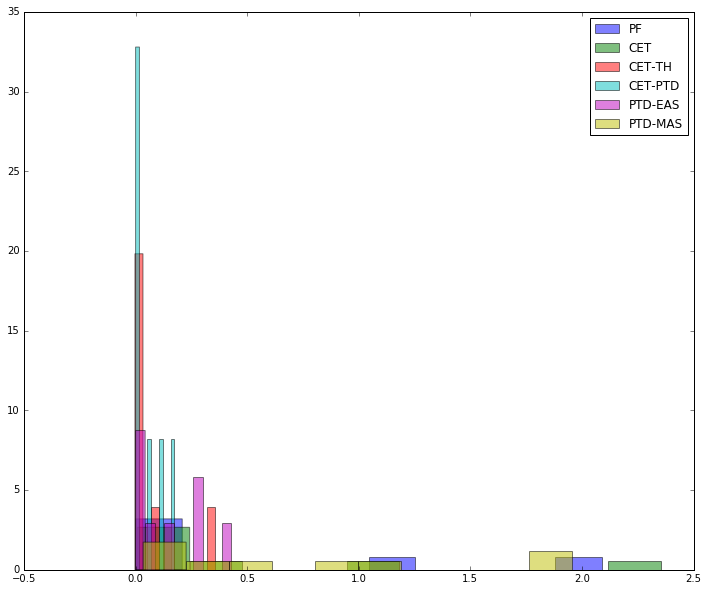

In [37]:
f, ax = plt.subplots(figsize = (12,10))

graphs.histo(group_dict, 'k', bins=10, ax = ax)

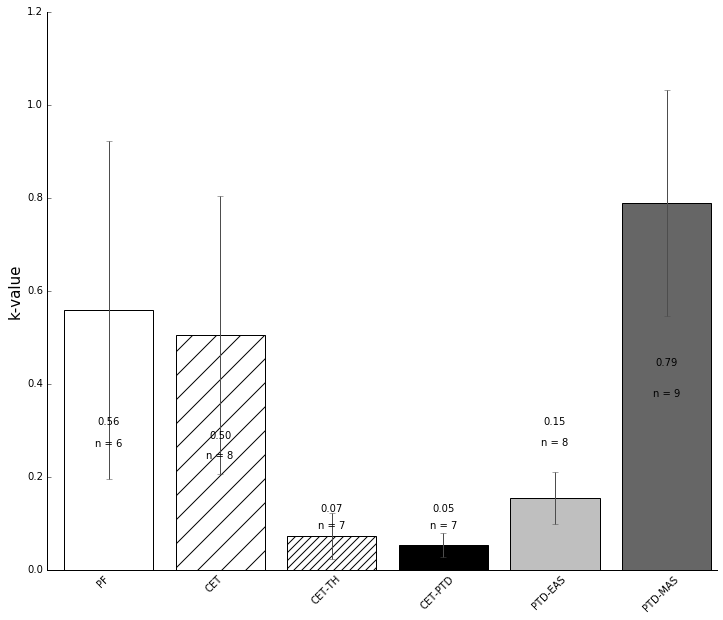

In [38]:
f, ax = plt.subplots(figsize = (12,10))
graphs.bar(dm.by_group(info, 'group', 'k'), ylabel = 'k-value', ax=ax)

##### Kruskal-Wallis Test

In [39]:
scipy.stats.mstats.kruskalwallis(*[group['k'] for group in group_dict.values()])

KruskalResult(statistic=11.345709684840102, pvalue=0.044940437583532)

##### Permutation F-Test

In [40]:
report, p = perm.permuted_f([group['k'] for group in group_dict.values()],
                        num_permutes = 100000)

if p <= .05:
    df_t, df_p = perm.perm_mc_ttests([cet[k], pf[k], cetptd[k], cetth[k], ptdeas[k], ptdmas[k]],
                                nperms = 10000,
                                labels = labels)
else:
    df_t = pd.DataFrame()
    
report

'F(5, 39) = 2.10477947858, p = 0.07624'

In [41]:
if df_t.empty == False:
    print df_t
    print
    print df_p 

##### parametric F-Test in R

In [42]:
%%R

# one way anova for mean average slope for each group
anova_k

Single term deletions

Model:
k ~ group
       Df Sum of Sq    RSS    AIC F value  Pr(>F)  
<none>              13.488 -42.22                  
group   5    3.6395 17.127 -41.47  2.1048 0.08537 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
